# Assignment 1 - Part 3

Question 3.1:

In [1]:
# import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import altair as alt

Let's get the dataset we want to read from.

In [2]:
from sklearn.datasets import load_boston

Let's read the dataset now.



In [3]:
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

We can see the column names and first 5 rows of the Boston House Prices dataset. Let's do more investigation about the data frame.

In [6]:
df.shape

(506, 13)

One thing to note is that our target value is the Median value of owner-occupied homes in thousands of dollars, called `MEDV`

In [7]:
df['MEDV'] = boston_dataset.target

Let's check the dataframe now after adding the target.

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Part 1: 
Let's see if we have any missing values, NaNs or NAs. 

In [9]:
null_values = df.isnull().sum().sum()# sums all the nulls in columns and 2nd sum adds them together -> 
print('Null values: ', null_values) 
nan_values = df.isna().sum().sum()
print('NaN values: ', nan_values) 

Null values:  0
NaN values:  0


We have seen that there is no missing, Null or NA values, so we can go onto the next part of our analysis including describing the data and then splitting the dataset into training and testing sets. 

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
train_size = int(df.shape[0]*0.8) # 404
test_size = int(df.shape[0]*0.2) # 101
print(train_size, test_size)

404 101


In [12]:
#round(df.shape[0]*0.8)

In [13]:
#round(df.shape[0]*0.2)

In [14]:
#print(X_test.mean())

In [15]:
X_train = df.iloc[:train_size, :-1]
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77
401,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32
402,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31


In [16]:
X_test = df.iloc[train_size:,  :-1]
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
404,41.52920,0.0,18.10,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
406,20.71620,0.0,18.10,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34
407,11.95110,0.0,18.10,0.0,0.659,5.608,100.0,1.2852,24.0,666.0,20.2,332.09,12.13
408,7.40389,0.0,18.10,0.0,0.597,5.617,97.9,1.4547,24.0,666.0,20.2,314.64,26.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [17]:
Y_train = df.iloc[:train_size, -1:]
Y_train

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
399,6.3
400,5.6
401,7.2
402,12.1


In [18]:
Y_test = df.iloc[train_size:, -1:]
Y_test

,MEDV
404,8.5
405,5.0
406,11.9
407,27.9
408,17.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [19]:
print(f'Training shapes: {X_train.shape}, {Y_train.shape}')
print(f'Testing shapes: {X_test.shape}, {Y_test.shape}')

Training shapes: (404, 13), (404, 1)
Testing shapes: (102, 13), (102, 1)


In [20]:
# Standardize the data - X_train.mean() or .std() same as what you get with describe() so it's per column 
#X_train.describe()
mean = X_train.mean()
std = X_train.std()

X_train = (X_train-mean)/std
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.307060,0.148838,-1.100375,-0.307597,0.054744,0.330487,0.026589,-0.038605,-0.890124,-0.432605,-1.227919,0.417806,-0.934279
1,-0.303685,-0.562300,-0.372129,-0.307597,-0.547891,0.120082,0.498127,0.363472,-0.736379,-0.843082,-0.101899,0.417806,-0.324611
2,-0.303688,-0.562300,-0.372129,-0.307597,-0.547891,1.163907,-0.114528,0.363472,-0.736379,-0.843082,-0.101899,0.317354,-1.073506
3,-0.302871,-0.562300,-1.120264,-0.307597,-0.643963,0.908416,-0.641135,0.865484,-0.582633,-0.995111,0.303468,0.361780,-1.233251
4,-0.296973,-0.562300,-1.120264,-0.307597,-0.643963,1.111989,-0.352017,0.865484,-0.582633,-0.995111,0.303468,0.417806,-0.882985


In [21]:
# X_test = (X_test-X_test.mean())/X_test.std()
# X_test[X_test['CHAS'] != 0]  # all 102 is 0 # ZN and CHAS
X_test = (X_test-mean)/std
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
404,6.369808,-0.5623,1.315383,-0.307597,1.408491,-1.095892,0.721849,-1.176670,2.646016,2.379927,0.979079,-1.246681,2.348547
405,10.613571,-0.5623,1.315383,-0.307597,1.408491,-0.888220,1.224363,-1.260101,2.646016,2.379927,0.979079,0.123362,1.703706
406,3.023083,-0.5623,1.315383,-0.307597,1.111540,-2.999096,1.224363,-1.373468,2.646016,2.379927,0.979079,-0.240683,1.756466
407,1.613658,-0.5623,1.315383,-0.307597,1.111540,-0.990689,1.224363,-1.324371,2.646016,2.379927,0.979079,-1.181770,0.113587
408,0.882467,-0.5623,1.315383,-0.307597,0.570041,-0.978393,1.152084,-1.246670,2.646016,2.379927,0.979079,-1.612454,2.204923


In [22]:
# fix the NaNs in test set
# X_test['ZN'] = 0
# X_test['CHAS'] = 0
# X_test.head()

In [23]:
#X_test.head()

We should add the bias to our X_train matrix that we will use in the later sections.



In [24]:
X_train.insert(loc = 0, column = 'bias',
          value = 1)
X_train.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,-0.307060,0.148838,-1.100375,-0.307597,0.054744,0.330487,0.026589,-0.038605,-0.890124,-0.432605,-1.227919,0.417806,-0.934279
1,1,-0.303685,-0.562300,-0.372129,-0.307597,-0.547891,0.120082,0.498127,0.363472,-0.736379,-0.843082,-0.101899,0.417806,-0.324611
2,1,-0.303688,-0.562300,-0.372129,-0.307597,-0.547891,1.163907,-0.114528,0.363472,-0.736379,-0.843082,-0.101899,0.317354,-1.073506
3,1,-0.302871,-0.562300,-1.120264,-0.307597,-0.643963,0.908416,-0.641135,0.865484,-0.582633,-0.995111,0.303468,0.361780,-1.233251
4,1,-0.296973,-0.562300,-1.120264,-0.307597,-0.643963,1.111989,-0.352017,0.865484,-0.582633,-0.995111,0.303468,0.417806,-0.882985


In [25]:
# train_size = int(df.shape[0]*0.8)
# test_size = int(df.shape[0]*0.2)
# print(train_size, test_size)

In [26]:
# X_train = df.iloc[:train_size, :-1]
# X_train

In [27]:
# X_test = df.iloc[train_size:,  :-1]
# X_test

In [28]:
# Y_train = df.iloc[:train_size, -1:]
# Y_train

In [29]:
# Y_test = df.iloc[train_size:, -1:]
# Y_test

In [30]:
X_test.insert(loc = 0, column = 'bias',
          value = 1)
X_test.head()
print(f'Training shapes: {X_train.shape}, {Y_train.shape}')
print(f'Testing shapes: {X_test.shape}, {Y_test.shape}')

Training shapes: (404, 14), (404, 1)
Testing shapes: (102, 14), (102, 1)


## Part 2: 
Let's work on the first-order Linear Regression.

We know the optimal weight is 
$ w $= $(X^TX)$^(-1)$X^Ty$ 

In [31]:
X = X_train.to_numpy()
Y = Y_train.to_numpy()

In [32]:
X_transpose = np.transpose(X)
X_transpose_X = np.matmul(X_transpose, X)
W = np.matmul(np.matmul(np.linalg.inv(X_transpose_X), X_transpose), Y)
W_first_order = W.copy()

Now that we have the X, W and Y, we can 

In [33]:
Y_hat = np.matmul(X, W)

Let's convert the Y_hat back to Pandas data frame and use it in our data frame that we will then use to plot.

In [34]:
df_first_order = X_train.copy()
df_first_order['Y_hat'] = Y_hat
df_first_order

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y_hat
0,1,-0.307060,0.148838,-1.100375,-0.307597,0.054744,0.330487,0.026589,-0.038605,-0.890124,-0.432605,-1.227919,0.417806,-0.934279,29.139797
1,1,-0.303685,-0.562300,-0.372129,-0.307597,-0.547891,0.120082,0.498127,0.363472,-0.736379,-0.843082,-0.101899,0.417806,-0.324611,24.845703
2,1,-0.303688,-0.562300,-0.372129,-0.307597,-0.547891,1.163907,-0.114528,0.363472,-0.736379,-0.843082,-0.101899,0.317354,-1.073506,31.159190
3,1,-0.302871,-0.562300,-1.120264,-0.307597,-0.643963,0.908416,-0.641135,0.865484,-0.582633,-0.995111,0.303468,0.361780,-1.233251,29.325213
4,1,-0.296973,-0.562300,-1.120264,-0.307597,-0.643963,1.111989,-0.352017,0.865484,-0.582633,-0.995111,0.303468,0.417806,-0.882985,28.774740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1,1.286503,-0.562300,1.315383,-0.307597,1.408491,-0.657321,0.460266,-1.225720,2.646016,2.379927,0.979079,-1.031956,2.728123,12.526357
400,1,3.719330,-0.562300,1.315383,-0.307597,1.408491,-0.472876,1.224363,-1.185196,2.646016,2.379927,0.979079,0.417806,2.259148,11.647404
401,1,1.981101,-0.562300,1.315383,-0.307597,1.408491,0.013514,1.224363,-1.191935,2.646016,2.379927,0.979079,0.417806,1.313870,18.979442
402,1,1.234912,-0.562300,1.315383,-0.307597,1.408491,0.096856,1.224363,-1.162184,2.646016,2.379927,0.979079,-0.095312,1.312405,20.169761


In [35]:
df_first_order['Y'] = Y_train
df_first_order

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y_hat,Y
0,1,-0.307060,0.148838,-1.100375,-0.307597,0.054744,0.330487,0.026589,-0.038605,-0.890124,-0.432605,-1.227919,0.417806,-0.934279,29.139797,24.0
1,1,-0.303685,-0.562300,-0.372129,-0.307597,-0.547891,0.120082,0.498127,0.363472,-0.736379,-0.843082,-0.101899,0.417806,-0.324611,24.845703,21.6
2,1,-0.303688,-0.562300,-0.372129,-0.307597,-0.547891,1.163907,-0.114528,0.363472,-0.736379,-0.843082,-0.101899,0.317354,-1.073506,31.159190,34.7
3,1,-0.302871,-0.562300,-1.120264,-0.307597,-0.643963,0.908416,-0.641135,0.865484,-0.582633,-0.995111,0.303468,0.361780,-1.233251,29.325213,33.4
4,1,-0.296973,-0.562300,-1.120264,-0.307597,-0.643963,1.111989,-0.352017,0.865484,-0.582633,-0.995111,0.303468,0.417806,-0.882985,28.774740,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1,1.286503,-0.562300,1.315383,-0.307597,1.408491,-0.657321,0.460266,-1.225720,2.646016,2.379927,0.979079,-1.031956,2.728123,12.526357,6.3
400,1,3.719330,-0.562300,1.315383,-0.307597,1.408491,-0.472876,1.224363,-1.185196,2.646016,2.379927,0.979079,0.417806,2.259148,11.647404,5.6
401,1,1.981101,-0.562300,1.315383,-0.307597,1.408491,0.013514,1.224363,-1.191935,2.646016,2.379927,0.979079,0.417806,1.313870,18.979442,7.2
402,1,1.234912,-0.562300,1.315383,-0.307597,1.408491,0.096856,1.224363,-1.162184,2.646016,2.379927,0.979079,-0.095312,1.312405,20.169761,12.1


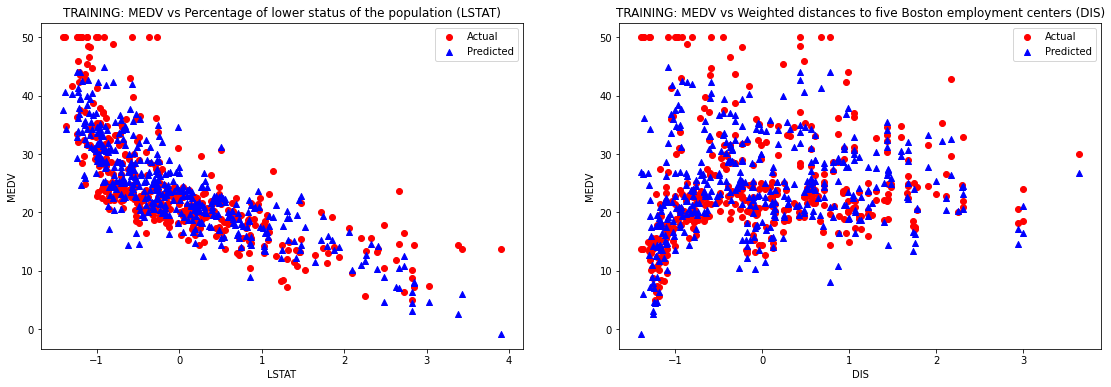

In [36]:
%matplotlib inline
plt.figure(figsize=(19, 6))
features_to_plot = ['LSTAT', 'DIS']
titles = ['Percentage of lower status of the population (LSTAT)', 'Weighted distances to five Boston employment centers (DIS)']
# LSTAT - Percentage of lower status of the population
# DIS - Weighted distances to five Boston employment centers
for i, col in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot) , i+1)
    plt.scatter(x = df_first_order[col], y = df_first_order['Y'], color = 'red', marker = 'o', label = 'Actual')
    plt.scatter(x = df_first_order[col], y = df_first_order['Y_hat'], color = 'blue', marker = '^', label = 'Predicted')

    plt.legend(loc="upper right")
    #plt.scatter(x, y, marker='o')
    plt.title('TRAINING: MEDV vs ' + titles[i])
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Part 3:
Let's work on the second-order Linear Regression.


In [37]:
x2 = X_train.copy()
x2.shape

(404, 14)

In [38]:
x2.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,-0.307060,0.148838,-1.100375,-0.307597,0.054744,0.330487,0.026589,-0.038605,-0.890124,-0.432605,-1.227919,0.417806,-0.934279
1,1,-0.303685,-0.562300,-0.372129,-0.307597,-0.547891,0.120082,0.498127,0.363472,-0.736379,-0.843082,-0.101899,0.417806,-0.324611
2,1,-0.303688,-0.562300,-0.372129,-0.307597,-0.547891,1.163907,-0.114528,0.363472,-0.736379,-0.843082,-0.101899,0.317354,-1.073506
3,1,-0.302871,-0.562300,-1.120264,-0.307597,-0.643963,0.908416,-0.641135,0.865484,-0.582633,-0.995111,0.303468,0.361780,-1.233251
4,1,-0.296973,-0.562300,-1.120264,-0.307597,-0.643963,1.111989,-0.352017,0.865484,-0.582633,-0.995111,0.303468,0.417806,-0.882985


In [39]:
df_first_part = x2.copy()
df_second_part = df_first_part.apply(lambda x: x**2, axis = 1) # x2 maybe 

In [40]:
df_first_part.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,-0.307060,0.148838,-1.100375,-0.307597,0.054744,0.330487,0.026589,-0.038605,-0.890124,-0.432605,-1.227919,0.417806,-0.934279
1,1,-0.303685,-0.562300,-0.372129,-0.307597,-0.547891,0.120082,0.498127,0.363472,-0.736379,-0.843082,-0.101899,0.417806,-0.324611
2,1,-0.303688,-0.562300,-0.372129,-0.307597,-0.547891,1.163907,-0.114528,0.363472,-0.736379,-0.843082,-0.101899,0.317354,-1.073506
3,1,-0.302871,-0.562300,-1.120264,-0.307597,-0.643963,0.908416,-0.641135,0.865484,-0.582633,-0.995111,0.303468,0.361780,-1.233251
4,1,-0.296973,-0.562300,-1.120264,-0.307597,-0.643963,1.111989,-0.352017,0.865484,-0.582633,-0.995111,0.303468,0.417806,-0.882985


In [41]:
df_second_part.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.094286,0.022153,1.210825,0.094616,0.002997,0.109222,0.000707,0.001490,0.792320,0.187147,1.507784,0.174562,0.872877
1,1.0,0.092224,0.316182,0.138480,0.094616,0.300185,0.014420,0.248130,0.132112,0.542254,0.710787,0.010383,0.174562,0.105373
2,1.0,0.092226,0.316182,0.138480,0.094616,0.300185,1.354680,0.013117,0.132112,0.542254,0.710787,0.010383,0.100714,1.152415
3,1.0,0.091731,0.316182,1.254992,0.094616,0.414689,0.825220,0.411054,0.749063,0.339462,0.990245,0.092093,0.130885,1.520907
4,1.0,0.088193,0.316182,1.254992,0.094616,0.414689,1.236520,0.123916,0.749063,0.339462,0.990245,0.092093,0.174562,0.779662


In [42]:
df_second_order = df_first_part.join(df_second_part, rsuffix = "_^2")
df_second_order

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,CHAS_^2,NOX_^2,RM_^2,AGE_^2,DIS_^2,RAD_^2,TAX_^2,PTRATIO_^2,B_^2,LSTAT_^2
0,1,-0.307060,0.148838,-1.100375,-0.307597,0.054744,0.330487,0.026589,-0.038605,-0.890124,...,0.094616,0.002997,0.109222,0.000707,0.001490,0.792320,0.187147,1.507784,0.174562,0.872877
1,1,-0.303685,-0.562300,-0.372129,-0.307597,-0.547891,0.120082,0.498127,0.363472,-0.736379,...,0.094616,0.300185,0.014420,0.248130,0.132112,0.542254,0.710787,0.010383,0.174562,0.105373
2,1,-0.303688,-0.562300,-0.372129,-0.307597,-0.547891,1.163907,-0.114528,0.363472,-0.736379,...,0.094616,0.300185,1.354680,0.013117,0.132112,0.542254,0.710787,0.010383,0.100714,1.152415
3,1,-0.302871,-0.562300,-1.120264,-0.307597,-0.643963,0.908416,-0.641135,0.865484,-0.582633,...,0.094616,0.414689,0.825220,0.411054,0.749063,0.339462,0.990245,0.092093,0.130885,1.520907
4,1,-0.296973,-0.562300,-1.120264,-0.307597,-0.643963,1.111989,-0.352017,0.865484,-0.582633,...,0.094616,0.414689,1.236520,0.123916,0.749063,0.339462,0.990245,0.092093,0.174562,0.779662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1,1.286503,-0.562300,1.315383,-0.307597,1.408491,-0.657321,0.460266,-1.225720,2.646016,...,0.094616,1.983846,0.432071,0.211845,1.502390,7.001400,5.664052,0.958596,1.064934,7.442658
400,1,3.719330,-0.562300,1.315383,-0.307597,1.408491,-0.472876,1.224363,-1.185196,2.646016,...,0.094616,1.983846,0.223612,1.499065,1.404690,7.001400,5.664052,0.958596,0.174562,5.103751
401,1,1.981101,-0.562300,1.315383,-0.307597,1.408491,0.013514,1.224363,-1.191935,2.646016,...,0.094616,1.983846,0.000183,1.499065,1.420709,7.001400,5.664052,0.958596,0.174562,1.726255
402,1,1.234912,-0.562300,1.315383,-0.307597,1.408491,0.096856,1.224363,-1.162184,2.646016,...,0.094616,1.983846,0.009381,1.499065,1.350671,7.001400,5.664052,0.958596,0.009084,1.722406


In [43]:
df_second_order = df_second_order.drop(columns = 'bias_^2') # Dropped the secon bias term - bias_^2

In [44]:
df_second_order.shape

(404, 27)

In [45]:
X = df_second_order.to_numpy()
Y = Y_train.to_numpy()
X_transpose = np.transpose(X)
X_transpose_X = np.matmul(X_transpose, X)
W = np.matmul(np.matmul(np.linalg.inv(X_transpose_X), X_transpose), Y)
W_second_order = W.copy()

In [46]:
Y_hat = np.matmul(X, W)

In [47]:
df_second_order['Y_hat'] = Y_hat
df_second_order['Y'] = Y_train
df_second_order

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,RM_^2,AGE_^2,DIS_^2,RAD_^2,TAX_^2,PTRATIO_^2,B_^2,LSTAT_^2,Y_hat,Y
0,1,-0.307060,0.148838,-1.100375,-0.307597,0.054744,0.330487,0.026589,-0.038605,-0.890124,...,0.109222,0.000707,0.001490,0.792320,0.187147,1.507784,0.174562,0.872877,27.810858,24.0
1,1,-0.303685,-0.562300,-0.372129,-0.307597,-0.547891,0.120082,0.498127,0.363472,-0.736379,...,0.014420,0.248130,0.132112,0.542254,0.710787,0.010383,0.174562,0.105373,24.374135,21.6
2,1,-0.303688,-0.562300,-0.372129,-0.307597,-0.547891,1.163907,-0.114528,0.363472,-0.736379,...,1.354680,0.013117,0.132112,0.542254,0.710787,0.010383,0.100714,1.152415,33.327773,34.7
3,1,-0.302871,-0.562300,-1.120264,-0.307597,-0.643963,0.908416,-0.641135,0.865484,-0.582633,...,0.825220,0.411054,0.749063,0.339462,0.990245,0.092093,0.130885,1.520907,33.079060,33.4
4,1,-0.296973,-0.562300,-1.120264,-0.307597,-0.643963,1.111989,-0.352017,0.865484,-0.582633,...,1.236520,0.123916,0.749063,0.339462,0.990245,0.092093,0.174562,0.779662,30.991282,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1,1.286503,-0.562300,1.315383,-0.307597,1.408491,-0.657321,0.460266,-1.225720,2.646016,...,0.432071,0.211845,1.502390,7.001400,5.664052,0.958596,1.064934,7.442658,14.085988,6.3
400,1,3.719330,-0.562300,1.315383,-0.307597,1.408491,-0.472876,1.224363,-1.185196,2.646016,...,0.223612,1.499065,1.404690,7.001400,5.664052,0.958596,0.174562,5.103751,6.715593,5.6
401,1,1.981101,-0.562300,1.315383,-0.307597,1.408491,0.013514,1.224363,-1.191935,2.646016,...,0.000183,1.499065,1.420709,7.001400,5.664052,0.958596,0.174562,1.726255,13.486410,7.2
402,1,1.234912,-0.562300,1.315383,-0.307597,1.408491,0.096856,1.224363,-1.162184,2.646016,...,0.009381,1.499065,1.350671,7.001400,5.664052,0.958596,0.009084,1.722406,16.331821,12.1


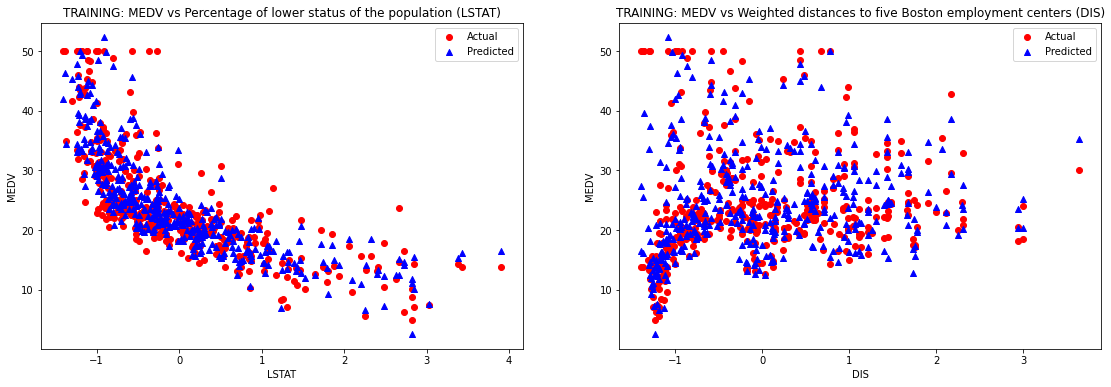

In [48]:
%matplotlib inline
plt.figure(figsize=(19, 6))
features_to_plot = ['LSTAT', 'DIS']
titles = ['Percentage of lower status of the population (LSTAT)', 'Weighted distances to five Boston employment centers (DIS)']
# LSTAT - Percentage of lower status of the population
# DIS - Weighted distances to five Boston employment centers

for i, col in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot) , i+1)
    plt.scatter(x = df_second_order[col], y = df_second_order['Y'], color = 'red', marker = 'o', label = 'Actual') # Actual
    plt.scatter(x = df_second_order[col], y = df_second_order['Y_hat'], color = 'blue', marker = '^', label = 'Predicted') # Predicted

    #plt.scatter(x, y, marker='o')
    plt.legend(loc="upper right")
    plt.title('TRAINING: MEDV vs ' + titles[i])
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Part 4:
Let's see what happens if we want to use Gaussian basis functions along with the original features to expand the original feature domain. 

This part of the assignment is **optional** based on the Piazza post. 

In [49]:
X.shape

(404, 27)

In [50]:
W.shape

(27, 1)

In [51]:
df_second_order.shape

(404, 29)

## Part 5:
MSE Errors for our different regression models.

**First-Order Regression on the Training Set**

In [52]:
# MSE = (sum (actual-predicted)^2 )/n
mse_first_order = df_first_order.copy()
mse_first_order['difference'] = mse_first_order['Y'] - mse_first_order['Y_hat']
mse_first_order['diff_squared'] = mse_first_order['difference']**2
mse_first_order.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y_hat,Y,difference,diff_squared
0,1,-0.307060,0.148838,-1.100375,-0.307597,0.054744,0.330487,0.026589,-0.038605,-0.890124,-0.432605,-1.227919,0.417806,-0.934279,29.139797,24.0,-5.139797,26.417511
1,1,-0.303685,-0.562300,-0.372129,-0.307597,-0.547891,0.120082,0.498127,0.363472,-0.736379,-0.843082,-0.101899,0.417806,-0.324611,24.845703,21.6,-3.245703,10.534587
2,1,-0.303688,-0.562300,-0.372129,-0.307597,-0.547891,1.163907,-0.114528,0.363472,-0.736379,-0.843082,-0.101899,0.317354,-1.073506,31.159190,34.7,3.540810,12.537336
3,1,-0.302871,-0.562300,-1.120264,-0.307597,-0.643963,0.908416,-0.641135,0.865484,-0.582633,-0.995111,0.303468,0.361780,-1.233251,29.325213,33.4,4.074787,16.603892
4,1,-0.296973,-0.562300,-1.120264,-0.307597,-0.643963,1.111989,-0.352017,0.865484,-0.582633,-0.995111,0.303468,0.417806,-0.882985,28.774740,36.2,7.425260,55.134481


In [53]:
mse_first_order.shape # 1 bias + 13 columns + Y_hat + Y + difference + diff_squared = 18 cols  

(404, 18)

In [54]:
first_order_sum = mse_first_order['diff_squared'].sum()
first_order_sum

9202.465326807518

In [55]:
MSE_first_value = first_order_sum /mse_first_order.shape[0]
MSE_first_value

22.778379521800787

**Second-Order Regression on the Training Set**

In [56]:
# second order 
mse_second_order = df_second_order.copy()
mse_second_order['difference'] = mse_second_order['Y'] - mse_second_order['Y_hat']
mse_second_order['diff_squared'] = mse_second_order['difference']**2
mse_second_order.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,DIS_^2,RAD_^2,TAX_^2,PTRATIO_^2,B_^2,LSTAT_^2,Y_hat,Y,difference,diff_squared
0,1,-0.307060,0.148838,-1.100375,-0.307597,0.054744,0.330487,0.026589,-0.038605,-0.890124,...,0.001490,0.792320,0.187147,1.507784,0.174562,0.872877,27.810858,24.0,-3.810858,14.522636
1,1,-0.303685,-0.562300,-0.372129,-0.307597,-0.547891,0.120082,0.498127,0.363472,-0.736379,...,0.132112,0.542254,0.710787,0.010383,0.174562,0.105373,24.374135,21.6,-2.774135,7.695826
2,1,-0.303688,-0.562300,-0.372129,-0.307597,-0.547891,1.163907,-0.114528,0.363472,-0.736379,...,0.132112,0.542254,0.710787,0.010383,0.100714,1.152415,33.327773,34.7,1.372227,1.883008
3,1,-0.302871,-0.562300,-1.120264,-0.307597,-0.643963,0.908416,-0.641135,0.865484,-0.582633,...,0.749063,0.339462,0.990245,0.092093,0.130885,1.520907,33.079060,33.4,0.320940,0.103002
4,1,-0.296973,-0.562300,-1.120264,-0.307597,-0.643963,1.111989,-0.352017,0.865484,-0.582633,...,0.749063,0.339462,0.990245,0.092093,0.174562,0.779662,30.991282,36.2,5.208718,27.130748


In [57]:
mse_second_order.shape # should be 26+1+1+1+2 (new ones) = 31 cols 

(404, 31)

In [58]:
second_order_sum = mse_second_order['diff_squared'].sum()
second_order_sum

5858.102772211854

In [59]:
MSE_second_value = second_order_sum/mse_second_order.shape[0]
MSE_second_value

14.500254386663006

So, we can see that these are the MSE values for our training set. MSE for the first-order regression on the training set is 22.78 and MSE for the second-order regression on the training set is 14.50. 

**First-Order Regression on the Testing Set**

In [60]:
df_test1 = X_test.copy()
df_test1.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
404,1,6.369808,-0.5623,1.315383,-0.307597,1.408491,-1.095892,0.721849,-1.176670,2.646016,2.379927,0.979079,-1.246681,2.348547
405,1,10.613571,-0.5623,1.315383,-0.307597,1.408491,-0.888220,1.224363,-1.260101,2.646016,2.379927,0.979079,0.123362,1.703706
406,1,3.023083,-0.5623,1.315383,-0.307597,1.111540,-2.999096,1.224363,-1.373468,2.646016,2.379927,0.979079,-0.240683,1.756466
407,1,1.613658,-0.5623,1.315383,-0.307597,1.111540,-0.990689,1.224363,-1.324371,2.646016,2.379927,0.979079,-1.181770,0.113587
408,1,0.882467,-0.5623,1.315383,-0.307597,0.570041,-0.978393,1.152084,-1.246670,2.646016,2.379927,0.979079,-1.612454,2.204923


In [61]:
# Testing MSE values and Testing Prediction Plots:
# For the 1st Order 
# df_test1 = X_test.copy()
X_test1 = X_test.to_numpy()
Y_hat1 = np.matmul(X_test1, W_first_order)

In [62]:
df_test1 = X_test.copy()
df_test1

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
404,1,6.369808,-0.5623,1.315383,-0.307597,1.408491,-1.095892,0.721849,-1.176670,2.646016,2.379927,0.979079,-1.246681,2.348547
405,1,10.613571,-0.5623,1.315383,-0.307597,1.408491,-0.888220,1.224363,-1.260101,2.646016,2.379927,0.979079,0.123362,1.703706
406,1,3.023083,-0.5623,1.315383,-0.307597,1.111540,-2.999096,1.224363,-1.373468,2.646016,2.379927,0.979079,-0.240683,1.756466
407,1,1.613658,-0.5623,1.315383,-0.307597,1.111540,-0.990689,1.224363,-1.324371,2.646016,2.379927,0.979079,-1.181770,0.113587
408,1,0.882467,-0.5623,1.315383,-0.307597,0.570041,-0.978393,1.152084,-1.246670,2.646016,2.379927,0.979079,-1.612454,2.204923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,-0.298005,-0.5623,0.371417,-0.307597,0.360429,0.355080,0.160823,-0.777297,-0.890124,-0.607438,1.339406,0.296622,-0.246937
502,1,-0.300797,-0.5623,0.371417,-0.307597,0.360429,-0.291163,0.422405,-0.864901,-0.890124,-0.607438,1.339406,0.417806,-0.333405
503,1,-0.298306,-0.5623,0.371417,-0.307597,0.360429,0.878358,0.914594,-0.919911,-0.890124,-0.607438,1.339406,0.417806,-0.837553
504,1,-0.290454,-0.5623,0.371417,-0.307597,0.360429,0.629698,0.856082,-0.818417,-0.890124,-0.607438,1.339406,0.332657,-0.714447


In [63]:
df_test1['Y_hat'] = Y_hat1
df_test1['Y'] = Y_test
df_test1.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y_hat,Y
404,1,6.369808,-0.5623,1.315383,-0.307597,1.408491,-1.095892,0.721849,-1.176670,2.646016,2.379927,0.979079,-1.246681,2.348547,5.886799,8.5
405,1,10.613571,-0.5623,1.315383,-0.307597,1.408491,-0.888220,1.224363,-1.260101,2.646016,2.379927,0.979079,0.123362,1.703706,3.787057,5.0
406,1,3.023083,-0.5623,1.315383,-0.307597,1.111540,-2.999096,1.224363,-1.373468,2.646016,2.379927,0.979079,-0.240683,1.756466,6.640550,11.9
407,1,1.613658,-0.5623,1.315383,-0.307597,1.111540,-0.990689,1.224363,-1.324371,2.646016,2.379927,0.979079,-1.181770,0.113587,21.312765,27.9
408,1,0.882467,-0.5623,1.315383,-0.307597,0.570041,-0.978393,1.152084,-1.246670,2.646016,2.379927,0.979079,-1.612454,2.204923,15.412714,17.2


In [64]:
df_test1.shape

(102, 16)

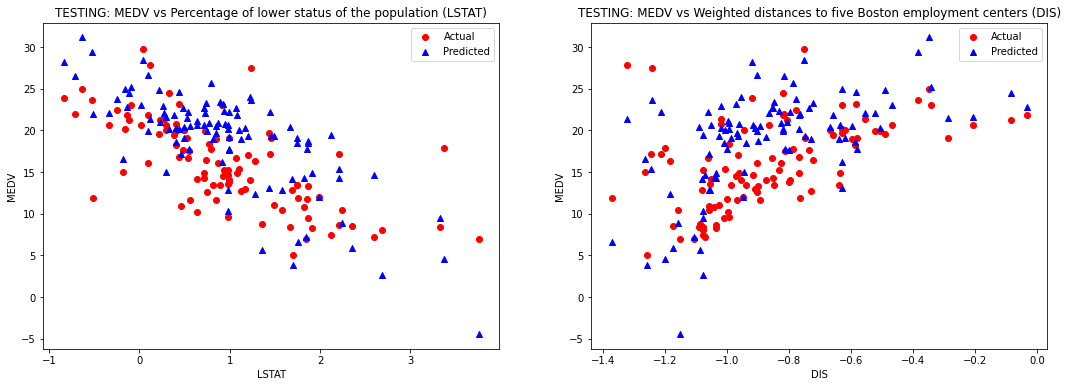

In [65]:
%matplotlib inline
plt.figure(figsize=(18, 6))
features_to_plot = ['LSTAT', 'DIS']
titles = ['Percentage of lower status of the population (LSTAT)', 'Weighted distances to five Boston employment centers (DIS)']
# LSTAT - Percentage of lower status of the population
# DIS - Weighted distances to five Boston employment centers
for i, col in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot) , i+1)
    plt.scatter(x = df_test1[col], y = df_test1['Y'], color = 'red', marker = 'o', label = 'Actual')
    plt.scatter(x = df_test1[col], y = df_test1['Y_hat'], color = 'blue', marker = '^', label = 'Predicted')

    plt.legend(loc="upper right")
    #plt.scatter(x, y, marker='o')
    plt.title('TESTING: MEDV vs ' + titles[i])
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [66]:
mse_first_order_test = df_test1.copy()
mse_first_order_test['difference'] = mse_first_order_test['Y'] - mse_first_order_test['Y_hat']
mse_first_order_test['diff_squared'] = mse_first_order_test['difference']**2
mse_first_order_test.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y_hat,Y,difference,diff_squared
404,1,6.369808,-0.5623,1.315383,-0.307597,1.408491,-1.095892,0.721849,-1.176670,2.646016,2.379927,0.979079,-1.246681,2.348547,5.886799,8.5,2.613201,6.828818
405,1,10.613571,-0.5623,1.315383,-0.307597,1.408491,-0.888220,1.224363,-1.260101,2.646016,2.379927,0.979079,0.123362,1.703706,3.787057,5.0,1.212943,1.471231
406,1,3.023083,-0.5623,1.315383,-0.307597,1.111540,-2.999096,1.224363,-1.373468,2.646016,2.379927,0.979079,-0.240683,1.756466,6.640550,11.9,5.259450,27.661818
407,1,1.613658,-0.5623,1.315383,-0.307597,1.111540,-0.990689,1.224363,-1.324371,2.646016,2.379927,0.979079,-1.181770,0.113587,21.312765,27.9,6.587235,43.391665
408,1,0.882467,-0.5623,1.315383,-0.307597,0.570041,-0.978393,1.152084,-1.246670,2.646016,2.379927,0.979079,-1.612454,2.204923,15.412714,17.2,1.787286,3.194391


In [67]:
first_order_sum_test = mse_first_order_test['diff_squared'].sum()
MSE_first_value_test = first_order_sum_test /mse_first_order_test.shape[0]
MSE_first_value_test

32.79986268020691

**Second-Order Regression on the Testing Set**

In [68]:
df_test2 = X_test.copy()
df_test2.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
404,1,6.369808,-0.5623,1.315383,-0.307597,1.408491,-1.095892,0.721849,-1.176670,2.646016,2.379927,0.979079,-1.246681,2.348547
405,1,10.613571,-0.5623,1.315383,-0.307597,1.408491,-0.888220,1.224363,-1.260101,2.646016,2.379927,0.979079,0.123362,1.703706
406,1,3.023083,-0.5623,1.315383,-0.307597,1.111540,-2.999096,1.224363,-1.373468,2.646016,2.379927,0.979079,-0.240683,1.756466
407,1,1.613658,-0.5623,1.315383,-0.307597,1.111540,-0.990689,1.224363,-1.324371,2.646016,2.379927,0.979079,-1.181770,0.113587
408,1,0.882467,-0.5623,1.315383,-0.307597,0.570041,-0.978393,1.152084,-1.246670,2.646016,2.379927,0.979079,-1.612454,2.204923


In [69]:
df_test2.shape

(102, 14)

In [70]:
# X_test2 = X_test.to_numpy()
# X_test2.shape

In [71]:
W_second_order.shape

(27, 1)

In [72]:
df_first_part_test2 = df_test2.copy()
df_first_part_test2

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
404,1,6.369808,-0.5623,1.315383,-0.307597,1.408491,-1.095892,0.721849,-1.176670,2.646016,2.379927,0.979079,-1.246681,2.348547
405,1,10.613571,-0.5623,1.315383,-0.307597,1.408491,-0.888220,1.224363,-1.260101,2.646016,2.379927,0.979079,0.123362,1.703706
406,1,3.023083,-0.5623,1.315383,-0.307597,1.111540,-2.999096,1.224363,-1.373468,2.646016,2.379927,0.979079,-0.240683,1.756466
407,1,1.613658,-0.5623,1.315383,-0.307597,1.111540,-0.990689,1.224363,-1.324371,2.646016,2.379927,0.979079,-1.181770,0.113587
408,1,0.882467,-0.5623,1.315383,-0.307597,0.570041,-0.978393,1.152084,-1.246670,2.646016,2.379927,0.979079,-1.612454,2.204923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,-0.298005,-0.5623,0.371417,-0.307597,0.360429,0.355080,0.160823,-0.777297,-0.890124,-0.607438,1.339406,0.296622,-0.246937
502,1,-0.300797,-0.5623,0.371417,-0.307597,0.360429,-0.291163,0.422405,-0.864901,-0.890124,-0.607438,1.339406,0.417806,-0.333405
503,1,-0.298306,-0.5623,0.371417,-0.307597,0.360429,0.878358,0.914594,-0.919911,-0.890124,-0.607438,1.339406,0.417806,-0.837553
504,1,-0.290454,-0.5623,0.371417,-0.307597,0.360429,0.629698,0.856082,-0.818417,-0.890124,-0.607438,1.339406,0.332657,-0.714447


In [73]:
df_second_part_test2 = df_first_part_test2.apply(lambda x: x**2, axis = 1)
df_second_part_test2

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
404,1.0,40.574460,0.316182,1.730233,0.094616,1.983846,1.200979,0.521066,1.384551,7.00140,5.664052,0.958596,1.554214,5.515672
405,1.0,112.647886,0.316182,1.730233,0.094616,1.983846,0.788934,1.499065,1.587856,7.00140,5.664052,0.958596,0.015218,2.902614
406,1.0,9.139034,0.316182,1.730233,0.094616,1.235521,8.994578,1.499065,1.886414,7.00140,5.664052,0.958596,0.057928,3.085172
407,1.0,2.603891,0.316182,1.730233,0.094616,1.235521,0.981466,1.499065,1.753960,7.00140,5.664052,0.958596,1.396581,0.012902
408,1.0,0.778749,0.316182,1.730233,0.094616,0.324947,0.957253,1.327297,1.554186,7.00140,5.664052,0.958596,2.600007,4.861686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.088807,0.316182,0.137950,0.094616,0.129909,0.126082,0.025864,0.604191,0.79232,0.368980,1.794007,0.087985,0.060978
502,1.0,0.090479,0.316182,0.137950,0.094616,0.129909,0.084776,0.178426,0.748053,0.79232,0.368980,1.794007,0.174562,0.111159
503,1.0,0.088986,0.316182,0.137950,0.094616,0.129909,0.771513,0.836482,0.846235,0.79232,0.368980,1.794007,0.174562,0.701495
504,1.0,0.084364,0.316182,0.137950,0.094616,0.129909,0.396520,0.732877,0.669807,0.79232,0.368980,1.794007,0.110660,0.510435


In [74]:
#df_first_part_test2

In [75]:
df_second_order2 = df_first_part_test2.join(df_second_part_test2, rsuffix = "_^2")
df_second_order2 = df_second_order2.drop(columns = 'bias_^2')
df_second_order2

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,CHAS_^2,NOX_^2,RM_^2,AGE_^2,DIS_^2,RAD_^2,TAX_^2,PTRATIO_^2,B_^2,LSTAT_^2
404,1,6.369808,-0.5623,1.315383,-0.307597,1.408491,-1.095892,0.721849,-1.176670,2.646016,...,0.094616,1.983846,1.200979,0.521066,1.384551,7.00140,5.664052,0.958596,1.554214,5.515672
405,1,10.613571,-0.5623,1.315383,-0.307597,1.408491,-0.888220,1.224363,-1.260101,2.646016,...,0.094616,1.983846,0.788934,1.499065,1.587856,7.00140,5.664052,0.958596,0.015218,2.902614
406,1,3.023083,-0.5623,1.315383,-0.307597,1.111540,-2.999096,1.224363,-1.373468,2.646016,...,0.094616,1.235521,8.994578,1.499065,1.886414,7.00140,5.664052,0.958596,0.057928,3.085172
407,1,1.613658,-0.5623,1.315383,-0.307597,1.111540,-0.990689,1.224363,-1.324371,2.646016,...,0.094616,1.235521,0.981466,1.499065,1.753960,7.00140,5.664052,0.958596,1.396581,0.012902
408,1,0.882467,-0.5623,1.315383,-0.307597,0.570041,-0.978393,1.152084,-1.246670,2.646016,...,0.094616,0.324947,0.957253,1.327297,1.554186,7.00140,5.664052,0.958596,2.600007,4.861686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,-0.298005,-0.5623,0.371417,-0.307597,0.360429,0.355080,0.160823,-0.777297,-0.890124,...,0.094616,0.129909,0.126082,0.025864,0.604191,0.79232,0.368980,1.794007,0.087985,0.060978
502,1,-0.300797,-0.5623,0.371417,-0.307597,0.360429,-0.291163,0.422405,-0.864901,-0.890124,...,0.094616,0.129909,0.084776,0.178426,0.748053,0.79232,0.368980,1.794007,0.174562,0.111159
503,1,-0.298306,-0.5623,0.371417,-0.307597,0.360429,0.878358,0.914594,-0.919911,-0.890124,...,0.094616,0.129909,0.771513,0.836482,0.846235,0.79232,0.368980,1.794007,0.174562,0.701495
504,1,-0.290454,-0.5623,0.371417,-0.307597,0.360429,0.629698,0.856082,-0.818417,-0.890124,...,0.094616,0.129909,0.396520,0.732877,0.669807,0.79232,0.368980,1.794007,0.110660,0.510435


In [76]:
df_second_order2.shape

(102, 27)

In [77]:
df_test2 = df_second_order2.copy()
X_test2 = df_test2.to_numpy()
Y_hat2 = np.matmul(X_test2, W_second_order)

In [78]:
df_test2['Y_hat'] = Y_hat2
df_test2['Y'] = Y_test
df_test2.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,RM_^2,AGE_^2,DIS_^2,RAD_^2,TAX_^2,PTRATIO_^2,B_^2,LSTAT_^2,Y_hat,Y
404,1,6.369808,-0.5623,1.315383,-0.307597,1.408491,-1.095892,0.721849,-1.176670,2.646016,...,1.200979,0.521066,1.384551,7.0014,5.664052,0.958596,1.554214,5.515672,1.675537,8.5
405,1,10.613571,-0.5623,1.315383,-0.307597,1.408491,-0.888220,1.224363,-1.260101,2.646016,...,0.788934,1.499065,1.587856,7.0014,5.664052,0.958596,0.015218,2.902614,0.535312,5.0
406,1,3.023083,-0.5623,1.315383,-0.307597,1.111540,-2.999096,1.224363,-1.373468,2.646016,...,8.994578,1.499065,1.886414,7.0014,5.664052,0.958596,0.057928,3.085172,12.708763,11.9
407,1,1.613658,-0.5623,1.315383,-0.307597,1.111540,-0.990689,1.224363,-1.324371,2.646016,...,0.981466,1.499065,1.753960,7.0014,5.664052,0.958596,1.396581,0.012902,20.125742,27.9
408,1,0.882467,-0.5623,1.315383,-0.307597,0.570041,-0.978393,1.152084,-1.246670,2.646016,...,0.957253,1.327297,1.554186,7.0014,5.664052,0.958596,2.600007,4.861686,18.125195,17.2


In [79]:
df_test2.shape

(102, 29)

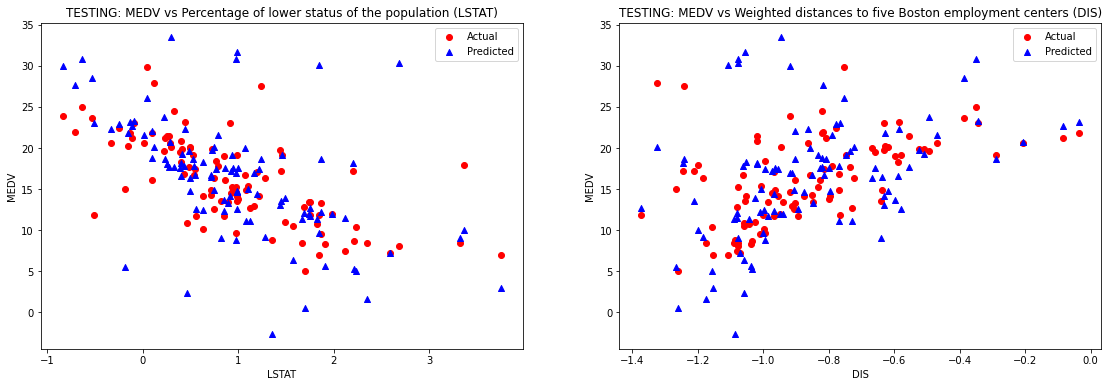

In [80]:
%matplotlib inline
plt.figure(figsize=(19, 6))
features_to_plot = ['LSTAT', 'DIS']
titles = ['Percentage of lower status of the population (LSTAT)', 'Weighted distances to five Boston employment centers (DIS)']
# LSTAT - Percentage of lower status of the population
# DIS - Weighted distances to five Boston employment centers
for i, col in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot) , i+1)
    plt.scatter(x = df_test2[col], y = df_test2['Y'], color = 'red', marker = 'o', label = 'Actual')
    plt.scatter(x = df_test2[col], y = df_test2['Y_hat'], color = 'blue', marker = '^', label = 'Predicted')

    plt.legend(loc="upper right")
    #plt.scatter(x, y, marker='o')
    plt.title('TESTING: MEDV vs ' + titles[i])
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [81]:
mse_second_order_test = df_test2.copy()
mse_second_order_test['difference'] = mse_second_order_test['Y'] - mse_second_order_test['Y_hat']
mse_second_order_test['diff_squared'] = mse_second_order_test['difference']**2
mse_second_order_test.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,DIS_^2,RAD_^2,TAX_^2,PTRATIO_^2,B_^2,LSTAT_^2,Y_hat,Y,difference,diff_squared
404,1,6.369808,-0.5623,1.315383,-0.307597,1.408491,-1.095892,0.721849,-1.176670,2.646016,...,1.384551,7.0014,5.664052,0.958596,1.554214,5.515672,1.675537,8.5,6.824463,46.573301
405,1,10.613571,-0.5623,1.315383,-0.307597,1.408491,-0.888220,1.224363,-1.260101,2.646016,...,1.587856,7.0014,5.664052,0.958596,0.015218,2.902614,0.535312,5.0,4.464688,19.933435
406,1,3.023083,-0.5623,1.315383,-0.307597,1.111540,-2.999096,1.224363,-1.373468,2.646016,...,1.886414,7.0014,5.664052,0.958596,0.057928,3.085172,12.708763,11.9,-0.808763,0.654098
407,1,1.613658,-0.5623,1.315383,-0.307597,1.111540,-0.990689,1.224363,-1.324371,2.646016,...,1.753960,7.0014,5.664052,0.958596,1.396581,0.012902,20.125742,27.9,7.774258,60.439084
408,1,0.882467,-0.5623,1.315383,-0.307597,0.570041,-0.978393,1.152084,-1.246670,2.646016,...,1.554186,7.0014,5.664052,0.958596,2.600007,4.861686,18.125195,17.2,-0.925195,0.855985


In [82]:
second_order_sum_test = mse_second_order_test['diff_squared'].sum()
#second_order_sum_test
MSE_second_value_test = second_order_sum_test /mse_second_order_test.shape[0]
MSE_second_value_test

33.805904946220906

When we look at our model's performance on the testing set, we can see that the Mean Squared Error (MSE) for the first-order regression is 32. On the other MSE value for the second-order regression on testing set is 33. 

We can interpret these MSE values as the Mean Squared Errors in predicting the Median value of owner-occupied homes in $1000’s. We also see that both our models perfomed really well in our training set. The first-order regression had around MSE of 22.78, and the second-order regression had MSE of 14.50. This suggests that second-order regression performed better on the training set than the first-order regression. This is mainly because of the fact that we can represent more complex approximations with second-order regression not just the simple linear equations. However, on the other hand, if we look at our models' perfomance on the testing set, we can clearly see that the we performed a bit poorly on the testing set compared to the training set with higher MSE values for both regression models. This is expected as we trained our model on the training set, and found the optimal weight parameters from the training set. MSE values on the testing set were 32 and 33, so in other words, training error was less than the testing error. The model that perfomed better is the second-order regression, and therefore, we can say that for this dataset, it would make more sense to use the second-order regression as it can represent more complex approximations/estimations. If we are interested in predicting housing prices, we need to have more data (a bigger dataset) to train and test our models, and most likely we will need to analyze and use other ML models as well.